In [1]:
import os
import tempfile
import shutil
import urllib
import zipfile
import pandas as pd

1.数据预处理 

数据预处理任务：清洗数据，处理缺失值，提取记录。首先我们读取数据集文件并创建一个空的数据框，而后解析数据集文件记录：

In [2]:
behaviors_path = os.path.join('./input', 'behaviors.tsv')
behaviors_df=pd.read_table(
    behaviors_path,
    header=None,
    names=['impression_id', 'user_id', 'time', 'history', 'impressions'])
behaviors_df

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...
...,...,...,...,...,...
156960,156961,U21593,11/14/2019 10:24:05 PM,N7432 N58559 N1954 N43353 N14343 N13008 N28833...,N2235-0 N22975-0 N64037-0 N47652-0 N11378-0 N4...
156961,156962,U10123,11/13/2019 6:57:04 AM,N9803 N104 N24462 N57318 N55743 N40526 N31726 ...,N3841-0 N61571-0 N58813-0 N28213-0 N4428-0 N25...
156962,156963,U75630,11/14/2019 10:58:13 AM,N29898 N59704 N4408 N9803 N53644 N26103 N812 N...,N55913-0 N62318-0 N53515-0 N10960-0 N9135-0 N5...
156963,156964,U44625,11/13/2019 2:57:02 PM,N4118 N47297 N3164 N43295 N6056 N38747 N42973 ...,N6219-0 N3663-0 N31147-0 N58363-0 N4107-0 N457...


In [3]:
news_path = os.path.join('./input', 'news.tsv')
news_df=pd.read_table(news_path,
              header=None,
              names=[
                  'id', 'category', 'subcategory', 'title', 'abstract', 'url',
                  'title_entities', 'abstract_entities'
              ])
news_df

,id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."
...,...,...,...,...,...,...,...,...
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,https://assets.msn.com/labs/mind/BBWzQJK.html,"[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid...","[{""Label"": ""Woolsey Fire"", ""Type"": ""N"", ""Wikid..."
51278,N47585,lifestyle,lifestylefamily,Family says 13-year-old Broadway star died fro...,NaN,https://assets.msn.com/labs/mind/BBWzQYV.html,"[{""Label"": ""Broadway theatre"", ""Type"": ""F"", ""W...",[]
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...",https://assets.msn.com/labs/mind/BBWzQnK.html,[],[]
51280,N34418,sports,soccer_epl,How the Sounders won MLS Cup,"Mark, Jeremiah and Casey were so excited they ...",https://assets.msn.com/labs/mind/BBWzQuK.html,"[{""Label"": ""MLS Cup"", ""Type"": ""U"", ""WikidataId...",[]


2.数据探索性分析: 

数据探索性分析任务：频繁模式挖掘：可以是项集、序列和图。

In [20]:
all_categories = news_df['subcategory']

# 定义一个函数，用于从类别信息中挖掘频繁项集
def find_frequent_itemsets(categories, min_support=0.01):
    category_counts = categories.value_counts(normalize=True)
    frequent_categories = category_counts[category_counts >= min_support].index.tolist()
    return frequent_categories

# 寻找频繁项集
frequent_categories = find_frequent_itemsets(all_categories)

# 打印频繁项集
print("Frequent categories:")
for category in frequent_categories:
    print(category)

Frequent categories:
newsus
football_nfl
newspolitics
newscrime
weathertopstories
newsworld
football_ncaa
baseball_mlb
basketball_nba
newsscienceandtechnology
news
newstrends
more_sports
travelarticle
travelnews
lifestylebuzz
autosnews
basketball_ncaa
financenews
finance-real-estate
finance-companies
icehockey_nhl


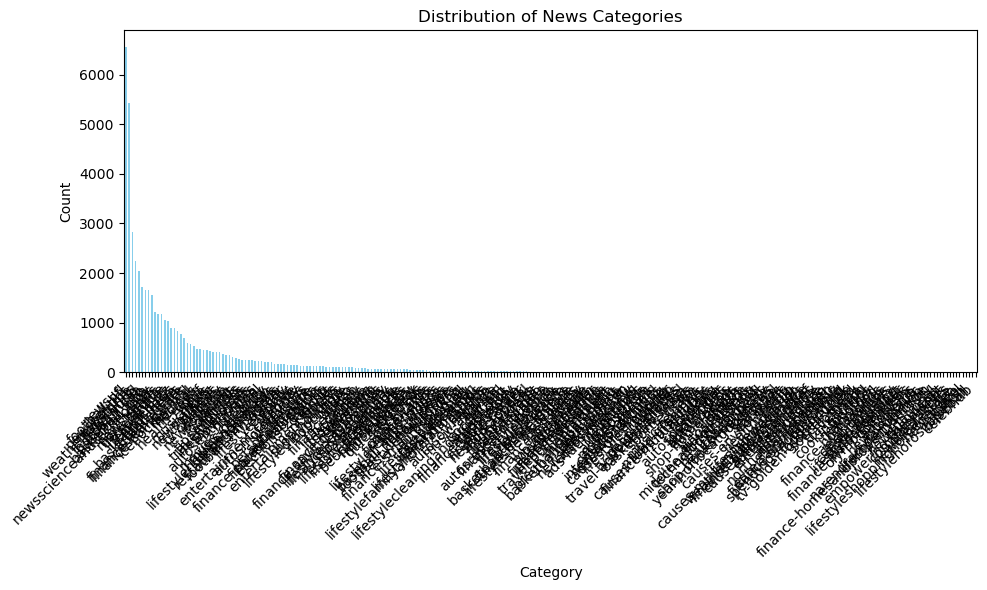

In [21]:
import matplotlib.pyplot as plt
category_counts = news_df['subcategory'].value_counts()

# 创建绘图
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 显示图形
plt.show()

3.关联规则挖掘: 

关联规则挖取任务：使用Apriori算法或FP-growth算法，根据用户浏览记录计算频繁项集和关联规则。关联规则挖掘是一种常用的数据挖掘技术，可以从数据集中发现项集之间的关联关系。 在这个任务中，我们将使用Apriori算法来计算频繁项集和关联规则。

In [22]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# 将数据集转换成适合Apriori算法处理的形式
user_data = []
last_user = '24186'
tmp = []

for index, row in news_df.iterrows():
    user_id = row['category']
    vroot_id = row['subcategory']
        
    if user_id == last_user:
        tmp.append(vroot_id)
    else:
        user_data.append(tmp)
        tmp = []
        tmp.append(vroot_id)
    last_user = user_id

user_data.append(tmp)
# user_data

te = TransactionEncoder()
data_encoded = te.fit_transform(user_data)
df = pd.DataFrame(data_encoded, columns=te.columns_)

df

,ads-latingrammys,ads-lung-health,advice,animals,autosbuying,autoscartech,autosclassics,autoscompact,autosenthusiasts,autoshybrids,...,voices,watch,weatherfullscreenmaps,weathertopstories,weight-loss,weightloss,wellness,wines,wonder,yearinoffbeatgoodnews
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41093,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
41094,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41095,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# 使用Apriori算法计算频繁项集
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# 打印频繁项集
print("Frequent Itemsets:")
# print(frequent_itemsets)
frequent_itemsets

Frequent Itemsets:


,support,itemsets
0,0.006229,(animals)
1,0.002896,(autosclassics)
2,0.005548,(autosenthusiasts)
3,0.003090,(autosmotorcycles)
4,0.020099,(autosnews)
...,...,...
132,0.001436,"(newscrime, newsscienceandtechnology, newsus)"
133,0.001557,"(newscrime, newsworld, newsus)"
134,0.001922,"(newspolitics, newsscienceandtechnology, newsus)"
135,0.002458,"(newsworld, newspolitics, newsus)"


In [26]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# 打印关联规则
print("\nAssociation Rules:")
# print(rules)
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(newsoffbeat),(newsus),0.009611,0.134803,0.003090,0.321519,2.385102,0.001795,1.275197,0.586367
1,(newsscienceandtechnology),(newsus),0.028469,0.134803,0.008881,0.311966,2.314234,0.005044,1.257491,0.584533
2,"(baseball_mlb, football_ncaa)",(football_nfl),0.003504,0.114047,0.001144,0.326389,2.861874,0.000744,1.315229,0.652866
3,"(newspolitics, newscrime)",(newsus),0.007519,0.134803,0.003285,0.436893,3.240975,0.002271,1.536470,0.696689
4,"(newsscienceandtechnology, newscrime)",(newsus),0.003382,0.134803,0.001436,0.424460,3.148746,0.000980,1.503280,0.684729
5,"(newsworld, newscrime)",(newsus),0.004648,0.134803,0.001557,0.335079,2.485690,0.000931,1.301202,0.600488
6,"(newspolitics, newsscienceandtechnology)",(newsus),0.004502,0.134803,0.001922,0.427027,3.167785,0.001315,1.510014,0.687416
7,"(newsworld, newspolitics)",(newsus),0.005694,0.134803,0.002458,0.431624,3.201886,0.001690,1.522226,0.691622
8,"(newsworld, newsscienceandtechnology)",(newsus),0.002482,0.134803,0.001071,0.431373,3.200021,0.000736,1.521553,0.689213


In [27]:
# 计算提升度
rules['lift'] = rules['lift'].apply(lambda x: round(x, 2))

# 进行卡方检验
observed = rules['support'] * len(df)  # 观察到的频数
expected = rules['antecedent support'] * rules['consequent support'] * len(df)  # 期望频数
chi_squared = ((observed - expected) ** 2 / expected).sum()  # 计算卡方值

# 输出结果
print("关联规则提升度:")
print(rules[['antecedents', 'consequents', 'lift']])
print("\n卡方检验结果:")
print("卡方值:", chi_squared)

关联规则提升度:
                                antecedents     consequents  lift
0                             (newsoffbeat)        (newsus)  2.39
1                (newsscienceandtechnology)        (newsus)  2.31
2             (baseball_mlb, football_ncaa)  (football_nfl)  2.86
3                 (newspolitics, newscrime)        (newsus)  3.24
4     (newsscienceandtechnology, newscrime)        (newsus)  3.15
5                    (newsworld, newscrime)        (newsus)  2.49
6  (newspolitics, newsscienceandtechnology)        (newsus)  3.17
7                 (newsworld, newspolitics)        (newsus)  3.20
8     (newsworld, newsscienceandtechnology)        (newsus)  3.20

卡方检验结果:
卡方值: 1120.7108790076857


4.结果评估 

结果评估任务：计算关联规则的支持度、置信度和提升度，得出强关联规则。 关联规则的支持度、置信度和提升度分别如上述结果中"support"、"confidence"和"lift"列所表示。可得出强关联规则有：

In [ ]:
0                             (newsoffbeat)        (newsus)  2.39
1                (newsscienceandtechnology)        (newsus)  2.31
2             (baseball_mlb, football_ncaa)  (football_nfl)  2.86
3                 (newspolitics, newscrime)        (newsus)  3.24
4     (newsscienceandtechnology, newscrime)        (newsus)  3.15
5                    (newsworld, newscrime)        (newsus)  2.49
6  (newspolitics, newsscienceandtechnology)        (newsus)  3.17
7                 (newsworld, newspolitics)        (newsus)  3.20
8     (newsworld, newsscienceandtechnology)        (newsus)  3.20